# Introdução Geral

### Funções úteis

In [1]:
import tensorflow as tf

In [2]:
import contextlib

# Some helper code to demonstrate the kinds of errors you might encounter.
@contextlib.contextmanager
def assert_raises(error_class):
  try:
    yield
  except error_class as e:
    print('Caught expected exception \n  {}: {}'.format(error_class, e))
  except Exception as e:
    print('Got unexpected exception \n  {}: {}'.format(type(e), e))
  else:
    raise Exception('Expected {} to be raised but no error was raised!'.format(
        error_class))

In [3]:
def how_loop_was_converted(f, *args):
  g = f.get_concrete_function(*args).graph
  if any(node.name == 'while' for node in g.as_graph_def().node):
    print("{}({}) usa tf.while_loop.".format(
        f.__name__, ', '.join(map(str, args))))
  elif any(node.name == 'ReduceDataset' for node in g.as_graph_def().node):
    print("{}({}) usa tf.data.Dataset.reduce.".format(
        f.__name__, ', '.join(map(str, args))))
  else:
    print("{}({}) foi desdobrado.".format(
        f.__name__, ', '.join(map(str, args))))

## Python como linguagem de cola

### Básico

In [4]:
from platform import python_version

print(python_version())

3.6.5


In [5]:
print(2/3)

0.6666666666666666


In [6]:
# python linguagem dinamica fortemente tipada com inferencia de tipos, reflexiva e genérica
c = 2

In [7]:
c

2

In [8]:
type(c)

int

In [9]:
c+'a'

TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Estruturas de Dados

#### Tuplas

In [10]:
tupla1 = (1,); dupla = (2,3)

In [11]:
tupla1[0], dupla[1]

(1, 3)

In [12]:
dupla[0] = 4

TypeError: 'tuple' object does not support item assignment

#### Listas

In [13]:
l1 = [1,2,3]
l2 = [4,5,6]
l3 = l1+l2
l3

[1, 2, 3, 4, 5, 6]

In [14]:
l3[2:5]

[3, 4, 5]

In [15]:
l3[-1]

6

In [16]:
list(range(10))[1:10:2]

[1, 3, 5, 7, 9]

#### Strings

In [17]:
s = 'string'
s

'string'

In [18]:
s[2]

'r'

In [19]:
s[2:4]

'ri'

In [20]:
list(s)

['s', 't', 'r', 'i', 'n', 'g']

In [21]:
'uma rosa eh uma rosa\n'.strip().split()

['uma', 'rosa', 'eh', 'uma', 'rosa']

#### Dicionários

In [22]:
cor = {'green':'verde', 'red':'vermelho', 'black':'preto'}

In [23]:
cor['green']

'verde'

In [24]:
cor.keys()

dict_keys(['green', 'red', 'black'])

In [25]:
for k in cor:
    print(cor[k])

verde
vermelho
preto


In [26]:
s = 'uma rosa eh uma rosa'

In [27]:
freq = dict([])
for w in s.split():
    freq[w] = 1 if w not in freq else freq[w]+1

In [28]:
freq

{'uma': 2, 'rosa': 2, 'eh': 1}

### Fluxo de Controle

In [29]:
for i in range(12):
    if i%2 == 0 and i%4 == 0:
        print('{0:2d} par e multiplo de 4'.format(i))
    elif i%2 == 0:
        print('{:2d} par'.format(i))
    else:
        print('{:2d} impar'.format(i))

 0 par e multiplo de 4
 1 impar
 2 par
 3 impar
 4 par e multiplo de 4
 5 impar
 6 par
 7 impar
 8 par e multiplo de 4
 9 impar
10 par
11 impar


#### Exceções

In [30]:
try:
    if np.random.rand() > 0.5:
        a = 1/0
    else:
        a = 1
except:
    print('oi???')
finally:
    print('tchau')

oi???
tchau


#### Funções e funções anônimas

In [31]:
def cubo(n):
    return n*n*n

In [32]:
cubo(3)

27

In [33]:
(lambda n: n*n*n)(3)

27

#### Decoradores

In [34]:
def f(x):
    return x

In [35]:
f('oi')

'oi'

In [36]:
def wrapper(f):
    def nf(x):
        print(f.__name__ + ': ' + f(x))
    return nf

In [37]:
wrapper(f)('oi')

f: oi


In [38]:
@wrapper
def f(x):
    return x

In [39]:
f('oi')

f: oi


#### Classes e Objetos

In [40]:
class Pessoa(object):
    def __init__(self, nome):
        self.nome = nome
        
    def fala(self):
        print('meu nome eh ' + self.nome)

In [41]:
p = Pessoa('Joao')

In [42]:
p.fala()

meu nome eh Joao


In [43]:
class Aluno(Pessoa):
    def __init__(self, nome, curso):
        Pessoa.__init__(self, nome)
        self.curso = curso
        
    def fala(self):
        Pessoa.fala(self)
        print('meu curso eh ' + self.curso)

In [44]:
a = Aluno('Tiago', 'CC')
a.fala()

meu nome eh Tiago
meu curso eh CC


In [45]:
c = 2

In [46]:
# python eh OO
print(dir(c))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [47]:
c.__add__(2)

4

In [48]:
c+4

6

In [49]:
c.__add__

<method-wrapper '__add__' of int object at 0x1078e87e0>

In [50]:
type(c)

int

In [51]:
type(int)

type

In [52]:
print(dir(int))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


In [53]:
print(dir(type))

['__abstractmethods__', '__base__', '__bases__', '__basicsize__', '__call__', '__class__', '__delattr__', '__dict__', '__dictoffset__', '__dir__', '__doc__', '__eq__', '__flags__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__instancecheck__', '__itemsize__', '__le__', '__lt__', '__module__', '__mro__', '__name__', '__ne__', '__new__', '__prepare__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasscheck__', '__subclasses__', '__subclasshook__', '__text_signature__', '__weakrefoffset__', 'mro']


In [54]:
def cubo(n):
    return n*n*n

In [55]:
cubo(3)

27

In [56]:
type(cubo)

function

In [57]:
print(dir(cubo))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [58]:
cubo.__call__(3)

27

In [59]:
print(dir(cubo.__code__))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'co_argcount', 'co_cellvars', 'co_code', 'co_consts', 'co_filename', 'co_firstlineno', 'co_flags', 'co_freevars', 'co_kwonlyargcount', 'co_lnotab', 'co_name', 'co_names', 'co_nlocals', 'co_stacksize', 'co_varnames']


In [60]:
print(cubo.__code__.co_filename)

<ipython-input-54-a33c545d5da5>


In [61]:
import inspect

In [64]:
source = inspect.getsource(cubo)

In [65]:
print(source)

def cubo(n):
    return n*n*n



In [66]:
def get_source_output(f):
    def new_f(x):
        print('Source:')
        print(inspect.getsource(f))
        print('Output:')
        print(f(x))
    return new_f

In [67]:
@get_source_output
def cubo(n):
    return n*n*n

In [68]:
cubo(3)

Source:
@get_source_output
def cubo(n):
    return n*n*n

Output:
27


## Numpy e Matplotlib

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
m1 = np.array(np.random.randint(0,100, size=(6, 6)))

In [71]:
m1

array([[50, 26, 72,  1, 60, 20],
       [87, 62, 87, 38, 33, 41],
       [ 0, 97, 65, 41, 25, 37],
       [39, 32, 16, 41, 10, 19],
       [68, 73, 66, 37, 84, 30],
       [92, 26, 77, 78, 82, 59]])

In [72]:
m1 @ m1.T

array([[12361, 15064,  9483,  4955, 15727, 16998],
       [15064, 23196, 15569,  9436, 21592, 24404],
       [ 9483, 15569, 17309,  6778, 16098, 14958],
       [ 4955,  9436,  6778,  4943,  8971, 10791],
       [15727, 21592, 16098,  8971, 23634, 24780],
       [16998, 24404, 14958, 10791, 24780, 31358]])

In [73]:
np.sqrt(m1)

array([[7.07106781, 5.09901951, 8.48528137, 1.        , 7.74596669,
        4.47213595],
       [9.32737905, 7.87400787, 9.32737905, 6.164414  , 5.74456265,
        6.40312424],
       [0.        , 9.8488578 , 8.06225775, 6.40312424, 5.        ,
        6.08276253],
       [6.244998  , 5.65685425, 4.        , 6.40312424, 3.16227766,
        4.35889894],
       [8.24621125, 8.54400375, 8.1240384 , 6.08276253, 9.16515139,
        5.47722558],
       [9.59166305, 5.09901951, 8.77496439, 8.83176087, 9.05538514,
        7.68114575]])

In [74]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

In [75]:
sigmoid(4)

0.9820137900379085

In [76]:
x = np.linspace(-10, 10, 50)

In [77]:
x

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

In [78]:
y = sigmoid(x)
y

array([4.53978687e-05, 6.82792246e-05, 1.02692018e-04, 1.54446212e-04,
       2.32277160e-04, 3.49316192e-04, 5.25297471e-04, 7.89865942e-04,
       1.18752721e-03, 1.78503502e-03, 2.68237328e-03, 4.02898336e-03,
       6.04752187e-03, 9.06814944e-03, 1.35769169e-02, 2.02816018e-02,
       3.01959054e-02, 4.47353464e-02, 6.58005831e-02, 9.57904660e-02,
       1.37437932e-01, 1.93321370e-01, 2.64947903e-01, 3.51547277e-01,
       4.49155938e-01, 5.50844062e-01, 6.48452723e-01, 7.35052097e-01,
       8.06678630e-01, 8.62562068e-01, 9.04209534e-01, 9.34199417e-01,
       9.55264654e-01, 9.69804095e-01, 9.79718398e-01, 9.86423083e-01,
       9.90931851e-01, 9.93952478e-01, 9.95971017e-01, 9.97317627e-01,
       9.98214965e-01, 9.98812473e-01, 9.99210134e-01, 9.99474703e-01,
       9.99650684e-01, 9.99767723e-01, 9.99845554e-01, 9.99897308e-01,
       9.99931721e-01, 9.99954602e-01])

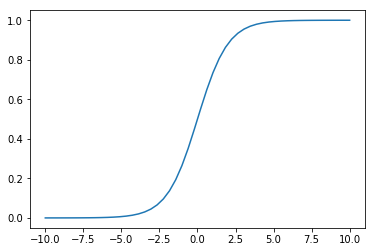

In [79]:
plt.plot(x, y)

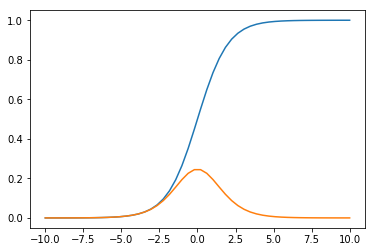

In [80]:
plt.plot(x, y)
plt.plot(x, np.gradient(y, x))

## Pandas

In [81]:
import pandas as pd

In [82]:
df = pd.DataFrame(np.random.randint(0,100,size=(10000, 2)), 
                  columns=['C1', 'C2'])

In [83]:
df.head()

,C1,C2
0,88,86
1,82,78
2,77,73
3,19,29
4,85,57


In [84]:
df.values

array([[88, 86],
       [82, 78],
       [77, 73],
       ...,
       [62,  3],
       [81,  8],
       [74, 78]])

In [85]:
df[df.C1>98].C2.sum()

5410

In [86]:
df['C3'] = df['C1']+df['C2']
df.head()

,C1,C2,C3
0,88,86,174
1,82,78,160
2,77,73,150
3,19,29,48
4,85,57,142


In [87]:
df['C3'] = df.apply(lambda r: r.C1+r.C2, axis = 1)
df.head()

,C1,C2,C3
0,88,86,174
1,82,78,160
2,77,73,150
3,19,29,48
4,85,57,142


In [88]:
%timeit df['C1']+df['C2']

142 µs ± 7.68 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [89]:
%timeit df.apply(lambda r: r.C1+r.C2, axis = 1)

260 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Tensorflow

In [90]:
import tensorflow as tf

In [91]:
tf.__version__

'2.0.0-dev20190806'

### Características

* Reimplementação do numpy para diferentes plataformas de hardware
* Suporte a distribuição
* JIT compiler com otimizador para velocidade e memória: 
    * python -> grafo de computação -> otimizador -> execução eficiente
* Formatos portáveis para permitir criação e deployment de modelos em ambientes diferentes
* Autodiff com suporte a dezenas de otimizadores
* Diversas bibliotecas de apoio
    * **APIs de alto nivel**: estimator, feature_column, **keras** (95%)
    * **I/O e pré-processamento**: data, io, queue, image, srtrings
    * **APIs de baixo nível**: nn, rnn, train
    * **Autodiferenciação**: GradientsTape, gradients
    * **Otimização e Produção**: saved_model, autograph, lite, distribute, quantization, graph_util
    * **Visualização**: summary
    * **Estruturas de dados**: sparse, ragged, sets
    * **Matemática**: math, linalg, signal, random, bitwise
* Ferramentas e serviços de apoio
    * **Tensorboard**: monitoração e visualização
    * **Tensorflow Extended**: validação de dados, pré-processamento, análise de modelos e serviço (deploy, etc)
    * **Tensorflow Hub**: modelos pré-treinados

### Arquitetura

<img src="imagens/tf2arquitetura.png" alt="drawing" width="600"/>

### Tensores e Operações

In [92]:
mnp = np.array([[1.,2,3],[4,5,6]])

In [93]:
mnp

array([[1., 2., 3.],
       [4., 5., 6.]])

In [94]:
mnp = tf.constant([[1.,2,3],[4,5,6]])

In [95]:
mnp

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [96]:
print(mnp.numpy()), print(mnp)

[[1. 2. 3.]
 [4. 5. 6.]]
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


(None, None)

In [97]:
tf.constant(42)

<tf.Tensor: id=1, shape=(), dtype=int32, numpy=42>

In [98]:
mnp.shape

TensorShape([2, 3])

In [99]:
mnp.dtype

tf.float32

In [100]:
mnp[1,:]

<tf.Tensor: id=5, shape=(3,), dtype=float32, numpy=array([4., 5., 6.], dtype=float32)>

In [101]:
mnp[:,1:]

<tf.Tensor: id=9, shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [102]:
mnp * 2

<tf.Tensor: id=11, shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [103]:
mnp

<tf.Tensor: id=0, shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [104]:
2 * mnp

<tf.Tensor: id=13, shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [105]:
tf.square(mnp)

<tf.Tensor: id=14, shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [106]:
mnp @ tf.transpose(mnp) # mnp.T em numpy significa uma visao - em TF, uma copia transposta

<tf.Tensor: id=17, shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [107]:
sum(mnp)

<tf.Tensor: id=28, shape=(3,), dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>

In [108]:
tf.reduce_sum(mnp, axis = 0) # ordem de avaliacao nao garantida

<tf.Tensor: id=30, shape=(3,), dtype=float32, numpy=array([5., 7., 9.], dtype=float32)>

In [109]:
np.sum(mnp, axis = 0) # ordem de avaliacao garantida

array([5., 7., 9.], dtype=float32)

In [110]:
tf.math.add(mnp, 1) 

<tf.Tensor: id=32, shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)>

In [111]:
tf.add(mnp, 1) # aliases onde eh ok math.add -> add

<tf.Tensor: id=34, shape=(2, 3), dtype=float32, numpy=
array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)>

### Tensores e Numpy

In [112]:
m = np.array([2.,4,5], dtype=np.float32)

In [113]:
t = tf.constant(m)

In [114]:
tf.square(m)

<tf.Tensor: id=37, shape=(3,), dtype=float32, numpy=array([ 4., 16., 25.], dtype=float32)>

In [115]:
np.square(t)

array([ 4., 16., 25.], dtype=float32)

#### Conversões

In [116]:
tf.constant(4)+tf.constant(2.0)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:AddV2] name: add/

In [117]:
tf.constant(4., dtype=tf.float32)+tf.constant(2.0, dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: add/

In [118]:
tf.constant(4., dtype=tf.float32)+tf.constant(2.0, dtype=tf.float32)

<tf.Tensor: id=44, shape=(), dtype=float32, numpy=6.0>

In [119]:
tf.constant(4.)+tf.cast(tf.constant(2), dtype=tf.float32)

<tf.Tensor: id=48, shape=(), dtype=float32, numpy=6.0>

### Variáveis

In [120]:
v = tf.Variable([[1,2,3],[4,5,6.]])

In [121]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [122]:
v.assign(v*2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [123]:
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

### Mais estruturas de dados

#### tensores esparsos

In [124]:
from tensorflow import SparseTensor

In [125]:
st = SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])

In [126]:
tf.sparse.to_dense(st)

<tf.Tensor: id=67, shape=(3, 4), dtype=int32, numpy=
array([[1, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]], dtype=int32)>

#### lista de tensores

In [127]:
from tensorflow import TensorArray

In [128]:
def unpack_to_array(tensor):
    return tf.TensorArray(tensor.dtype, tf.shape(tensor)[0]).unstack(tensor)

In [129]:
t = tf.constant([[1,2,3],[4,5,6],[7,8,9]])

In [130]:
ta = unpack_to_array(t)

In [131]:
print(ta.read(1))

tf.Tensor([4 5 6], shape=(3,), dtype=int32)


#### tensores irregulates (ragged)

In [132]:
digits = tf.ragged.constant([[3, 1, 4, 1], [], [5, 9, 2], [6], []])
print(digits + 3)
print(tf.concat([digits, [[5, 3]]], axis=0))
print(tf.tile(digits, [1, 2]))

<tf.RaggedTensor [[6, 4, 7, 4], [], [8, 12, 5], [9], []]>
<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], [], [5, 3]]>
<tf.RaggedTensor [[3, 1, 4, 1, 3, 1, 4, 1], [], [5, 9, 2, 5, 9, 2], [6, 6], []]>


#### Strings (byte strings)

In [133]:
words = tf.ragged.constant([["So", "long"], ["thanks", "for", "all", "the", "fish"]])
print(tf.strings.substr(words, 0, 2))

<tf.RaggedTensor [[b'So', b'lo'], [b'th', b'fo', b'al', b'th', b'fi']]>


#### Conjuntos

In [134]:
import collections

# [[{1, 2}, {3}], [{4}, {5, 6}]]
a = collections.OrderedDict([
  ((0, 0, 0), 1),
  ((0, 0, 1), 2),
  ((0, 1, 0), 3),
  ((1, 0, 0), 4),
  ((1, 1, 0), 5),
  ((1, 1, 1), 6),
])
a = tf.SparseTensor(list(a.keys()), list(a.values()), dense_shape=[2, 2, 2])

# [[{1, 3}, {2}], [{4, 5}, {5, 6, 7, 8}]]
b = collections.OrderedDict([
  ((0, 0, 0), 1),
  ((0, 0, 1), 3),
  ((0, 1, 0), 2),
  ((1, 0, 0), 4),
  ((1, 0, 1), 5),
  ((1, 1, 0), 5),
  ((1, 1, 1), 6),
  ((1, 1, 2), 7),
  ((1, 1, 3), 8),
])
b = tf.SparseTensor(list(b.keys()), list(b.values()), dense_shape=[2, 2, 4])

# `set_union` is applied to each aligned pair of sets.
# union of elements in last dimension
aub = tf.sets.union(a, b)

In [135]:
print(aub)

SparseTensor(indices=tf.Tensor(
[[0 0 0]
 [0 0 1]
 [0 0 2]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]
 [1 1 2]
 [1 1 3]], shape=(11, 3), dtype=int64), values=tf.Tensor([1 2 3 2 3 4 5 5 6 7 8], shape=(11,), dtype=int32), dense_shape=tf.Tensor([2 2 4], shape=(3,), dtype=int64))


#### Filas
FIFOqueue, PaddingFIFOQueue, PriorityQueue, RandomShuffleQueue

##### FIFOQueue

In [136]:
import tensorflow as tf
q = tf.queue.FIFOQueue(capacity=10, dtypes=[tf.string])

In [137]:
q.enqueue('a')
q.enqueue('b')
q.enqueue('c')

In [138]:
q.dequeue(), q.dequeue(), q.dequeue()

(<tf.Tensor: id=246, shape=(), dtype=string, numpy=b'a'>,
 <tf.Tensor: id=247, shape=(), dtype=string, numpy=b'b'>,
 <tf.Tensor: id=248, shape=(), dtype=string, numpy=b'c'>)

##### PriorityQueue

In [139]:
pq = tf.queue.PriorityQueue(capacity=10, types=[tf.string], shapes=[[]])

In [140]:
pq.enqueue([4, 'a'])
pq.enqueue([1, 'b'])
pq.enqueue([2, 'c'])

In [141]:
pq.dequeue(), pq.dequeue(), pq.dequeue()

([<tf.Tensor: id=257, shape=(), dtype=int64, numpy=1>,
  <tf.Tensor: id=258, shape=(), dtype=string, numpy=b'b'>],
 [<tf.Tensor: id=259, shape=(), dtype=int64, numpy=2>,
  <tf.Tensor: id=260, shape=(), dtype=string, numpy=b'c'>],
 [<tf.Tensor: id=261, shape=(), dtype=int64, numpy=4>,
  <tf.Tensor: id=262, shape=(), dtype=string, numpy=b'a'>])

##### PaddingFIFOQueue

In [142]:
import tensorflow as tf
import numpy as np

In [143]:
pdq = tf.queue.PaddingFIFOQueue(capacity=10, dtypes=[tf.int32], shapes=[(None,)])

In [144]:
pdq.enqueue(tf.constant([1]))
pdq.enqueue(tf.constant([2,3]))
pdq.enqueue(tf.constant([3,4,5]))

In [145]:
pdq.dequeue_many(n = 3)

<tf.Tensor: id=269, shape=(3, 3), dtype=int32, numpy=
array([[1, 0, 0],
       [2, 3, 0],
       [3, 4, 5]], dtype=int32)>

##### RandomShuffleQueue

In [146]:
rsq = tf.queue.RandomShuffleQueue(capacity=10, dtypes=[tf.string], min_after_dequeue=2, shapes = [[]])

In [147]:
rsq.enqueue('a')
rsq.enqueue('b')
rsq.enqueue('c')

In [148]:
rsq.dequeue()

<tf.Tensor: id=275, shape=(), dtype=string, numpy=b'c'>

In [149]:
rsq.size()

<tf.Tensor: id=276, shape=(), dtype=int32, numpy=2>

### Computação Dinâmica -- modo _eager_ (default em tensorflow 2 e pytorch)

In [150]:
def teste(v, n = 4):
    for i in range(n):
        v = v * 2
        print(v)
    return v

In [151]:
v = teste(tf.Variable([[1,2,3],[4,5,6]]))

tf.Tensor(
[[ 2  4  6]
 [ 8 10 12]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 4  8 12]
 [16 20 24]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 8 16 24]
 [32 40 48]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[16 32 48]
 [64 80 96]], shape=(2, 3), dtype=int32)


In [152]:
v

<tf.Tensor: id=292, shape=(2, 3), dtype=int32, numpy=
array([[16, 32, 48],
       [64, 80, 96]], dtype=int32)>

### Computação Estática -- modo _graph_ (default em tensorflow < 2)

In [158]:
@tf.function
def teste(v, n = 4):
    for i in tf.range(n):
        v = v * 2
        print(v)
    return v

In [161]:
v = teste(tf.Variable([[1,2,3],[4,5,6]]))

Tensor("mul:0", shape=(2, 3), dtype=int32)


In [162]:
v

<tf.Tensor: id=584, shape=(2, 3), dtype=int32, numpy=
array([[16, 32, 48],
       [64, 80, 96]], dtype=int32)>

In [163]:
v = teste(tf.Variable([[4,5,6],[4,5,6]]))

Tensor("mul:0", shape=(2, 3), dtype=int32)


In [164]:
v

<tf.Tensor: id=642, shape=(2, 3), dtype=int32, numpy=
array([[64, 80, 96],
       [64, 80, 96]], dtype=int32)>

#### Gradientes

Calcule o gradiente de $f(w_1, w_2) = 3 w_1^2 + 2 w_1 w_2$:

$\frac{\partial}{\partial w_1} f(w_1, w_2) = 6 w_1 + 2 w_2$

$\frac{\partial}{\partial w_1} f(5, 3) = 36$

$\frac{\partial}{\partial w_2} f(w_1, w_2) = 2 w_1$

$\frac{\partial}{\partial w_2} f(5, 3) = 10$

In [177]:
#@tf.function
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [178]:
w1, w2 = tf.Variable(5.), tf.Variable(3.) 

In [179]:
w1, w2

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>)

In [180]:
with tf.GradientTape() as tape: # persistent = True
    z = f(w1, w2)

In [181]:
gradients = tape.gradient(z, [w1, w2])

In [182]:
gradients

[<tf.Tensor: id=808, shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: id=800, shape=(), dtype=float32, numpy=10.0>]

In [183]:
tape.gradient(z, [w1, w2]) # fita eh apagada logo que eh usada uma vez!

RuntimeError: GradientTape.gradient can only be called once on non-persistent tapes.

#### Olhando mais de perto o modo tracing e suas implicações

In [184]:
def cubo(n):
    return n*n*n

In [185]:
cubo(3)

27

In [186]:
cubo(tf.constant(3.))

<tf.Tensor: id=811, shape=(), dtype=float32, numpy=27.0>

In [187]:
tf_cubo = tf.function(cubo)

In [188]:
tf_cubo(3)

<tf.Tensor: id=817, shape=(), dtype=int32, numpy=27>

In [189]:
tf_cubo(tf.constant(3.))

<tf.Tensor: id=825, shape=(), dtype=float32, numpy=27.0>

In [190]:
@tf.function
def cubo(n):
    return n*n*n

In [191]:
cubo(3.)

<tf.Tensor: id=831, shape=(), dtype=float32, numpy=27.0>

In [192]:
print(dir(cubo))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__original_wrapped__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '__wrapped__', '_autograph', '_concrete_stateful_fn', '_created_variables', '_decorate', '_defun', '_defun_with_scope', '_descriptor_cache', '_experimental_autograph_options', '_experimental_compile', '_function_spec', '_graph_deleter', '_initialize', '_initialize_uninitialized_variables', '_lifted_initializer_graph', '_list_all_concrete_functions_for_serialization', '_name', '_python_function', '_stateful_fn', '_stateless_fn', '_tf_decorator', 'experimental_relax_shapes', 'function_spec', 'get_concrete_function', 'get_initialization_function', 'input_signature', 'python_fu

In [193]:
print(tf.autograph.to_code(cubo.python_function))

def tf__cubo(n):
  do_return = False
  retval_ = ag__.UndefinedReturnValue()
  with ag__.FunctionScope('cubo', 'cubo_scope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as cubo_scope:
    do_return = True
    retval_ = cubo_scope.mark_return_value(n * n * n)
  do_return,
  return ag__.retval(retval_)



In [194]:
(cubo.python_function)(3)

27

<img src="imagens/python2graph.png" alt="drawing" width="600"/>

In [195]:
g = tf.autograph.to_graph(cubo.python_function)

In [197]:
print(dir(g))

['__annotations__', '__call__', '__class__', '__closure__', '__code__', '__defaults__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__get__', '__getattribute__', '__globals__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__kwdefaults__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__qualname__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'ag_module', 'ag_source_map', 'autograph_info__']


Modo _graph_

- Função é executada e rastreada (tracing) -- modo eager disabilidatado;
    - Todo o método TF define uma tf.Operation e gera um nó para o grafo com um tf.Tensor de saída (como em TF 1.x);
- Autograph analisa construtores Python para obter equivalentes TF2 (tf.while, tf.cond. tf.assert)
- tf.control_dependencies são incluídas para garantir ordem de execução;
- Grafo criado é otimizado e inserido em um mapa;
- Cada nova chamada à função executa o grafo correspondente no mapa;

Em geral,

- qualquer instrução que não seja tensorflow, será executada somente durante o tracing;
- efeitos colaterais (mudança de variável python, log, etc) só vão acontecer durante tracing;
- código python não será otimizado e ainda irá reduzir compatibilidade;


#### Tracing

In [198]:
@tf.function
def f():
    a = tf.constant([[10,10],[11.,1.]])
    x = tf.constant([[1.,0.],[0.,1.]])
    y = tf.matmul(a, x) + 12
    print("PRINT em tracing: ", y)
    tf.print("TF-PRINT em graph: ", y)
    return y

f() # constroi o grafo e o executa a 1a vez

PRINT em tracing:  Tensor("add:0", shape=(2, 2), dtype=float32)
TF-PRINT em graph:  [[22 22]
 [23 13]]


<tf.Tensor: id=842, shape=(2, 2), dtype=float32, numpy=
array([[22., 22.],
       [23., 13.]], dtype=float32)>

In [199]:
f() # executa o grafo construido (não há tracing)

TF-PRINT em graph:  [[22 22]
 [23 13]]


<tf.Tensor: id=843, shape=(2, 2), dtype=float32, numpy=
array([[22., 22.],
       [23., 13.]], dtype=float32)>

#### Polimorfismo
Como grafos são estáticos, tf.function gera o grafo de acordo com o tipo de entrada.

In [200]:
@tf.function
def dobre(a):
    print('tracing: ', a)
    return 2*a

In [201]:
dobre(2)

tracing:  2


<tf.Tensor: id=849, shape=(), dtype=int32, numpy=4>

In [202]:
dobre(tf.constant(2))

tracing:  Tensor("a:0", shape=(), dtype=int32)


<tf.Tensor: id=857, shape=(), dtype=int32, numpy=4>

In [203]:
dobre(tf.constant(3))

<tf.Tensor: id=859, shape=(), dtype=int32, numpy=6>

In [204]:
dobre(tf.constant(2.0))

tracing:  Tensor("a:0", shape=(), dtype=float32)


<tf.Tensor: id=867, shape=(), dtype=float32, numpy=4.0>

In [205]:
dobre('2')

tracing:  2


<tf.Tensor: id=872, shape=(), dtype=string, numpy=b'22'>

In [206]:
d_f32 = dobre.get_concrete_function(tf.TensorSpec(shape=None, dtype=tf.float32))

tracing:  Tensor("a:0", dtype=float32)


In [207]:
d_f32(tf.constant(2.0))

<tf.Tensor: id=880, shape=(), dtype=float32, numpy=4.0>

In [208]:
d_f32(tf.constant(2))

InvalidArgumentError: cannot compute __inference_dobre_878 as input #0(zero-based) was expected to be a float tensor but is a int32 tensor [Op:__inference_dobre_878]

O retrace para classes que não são TF é feito por objeto. Logo, mais um motivo para evitá-las.
- Logo, se vc pretende usar parâmetros da função que mudam o grafo (ex: nro_camadas), eh melhor usar TF --> nro_camadas = tf.constant(7)

#### Tracing & efeitos colaterais

In [209]:
external_list = []

def side_effect(x):
  print('Python side effect')
  external_list.append(x)

In [210]:
side_effect(1)
external_list

Python side effect


[1]

In [211]:
side_effect(1)
external_list

Python side effect


[1, 1]

In [212]:
external_list = []

@tf.function
def side_effect(x):
  print('Python side effect')
  external_list.append(x)

In [213]:
side_effect(1)
external_list

Python side effect


[1]

In [214]:
side_effect(1)
external_list

[1]

In [215]:
external_list = []

def side_effect(x):
  print('Python side effect')
  external_list.append(x)
    
@tf.function
def f(x):
  tf.py_function(side_effect, inp=[x], Tout=[]) # código não é portável! e pode ser ineficiente

In [216]:
f(1)
external_list

Python side effect


[<tf.Tensor: id=889, shape=(), dtype=int32, numpy=1>]

In [217]:
f(1)
external_list

Python side effect


[<tf.Tensor: id=889, shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: id=890, shape=(), dtype=int32, numpy=1>]

#### Criação de variáveis em modo eager e graph
Variáveis TF só podem ser criadas uma vez em modo graph. Em modo eager, cada criação é re-executada durante a interpretação.

In [228]:
# atualizando estado

@tf.function
def add():
    print('tracing')
    val = tf.Variable(0)
    val.assign(val + 1)
    return val

In [229]:
x = add()
print(x)

tracing
tracing


ValueError: in converted code:

    <ipython-input-222-02ef901b31b8>:6 add  *
        val = tf.Variable(0)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py:258 __call__
        return cls._variable_v2_call(*args, **kwargs)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py:252 _variable_v2_call
        shape=shape)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/variables.py:63 getter
        return captured_getter(captured_previous, **kwargs)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/eager/def_function.py:397 invalid_creator_scope
        "tf.function-decorated function tried to create "

    ValueError: tf.function-decorated function tried to create variables on non-first call.


In [230]:
# atualizando estado

class add (object):
    def __init__(self, val):
        self.val = tf.Variable(val)

    @tf.function
    def __call__(self):
        print('tracing')
        self.val.assign(self.val + 1)
        return self.val

In [231]:
x = add(0)

print(x())

tracing
tf.Tensor(1, shape=(), dtype=int32)


In [232]:
print(x())
print(x())
print(x())

tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


#### Condições

In [233]:
# se tensor eh criado em ramo do if, ele deve ser tb criado no outro ramo!
@tf.function
def f():
    if tf.constant(True):
        x = tf.ones([3, 3])
    # cade o else? -> if if gera tensor, tem que ter else gerando o tensor tb
    return x

# Throws an error because both branches need to define `x`.
with assert_raises(ValueError):
  f()

Caught expected exception 
  <class 'ValueError'>: in converted code:

    <ipython-input-233-fd6e1c7b4d14>:4 f  *
        if tf.constant(True):
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:893 if_stmt
        basic_symbol_names, composite_symbol_names)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:931 tf_if_stmt
        error_checking_orelse)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/util/deprecation.py:507 new_func
        return func(*args, **kwargs)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/control_flow_ops.py:1174 cond
        return cond_v2.cond_v2(pred, true_fn, false_fn, name)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/cond_v2.py:91 cond_v2
        op_return_value=pred)
    /Users/marcocristo/.local/lib/python3.6/si

In [235]:
# se tensor eh criado em ramo do if, ele deve ser tb criado no outro ramo!
@tf.function
def f():
    if tf.constant(True):
        x = tf.ones([3, 3])
    else:
        x = tf.zeros([3, 3])
    return x
f()

<tf.Tensor: id=1069, shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

#### Laços

Augograph converte laços de acordo com as regras abaixo:

- `for`: converte se o iterador é um tensor 
- `while`: converte se condição do `while` depende de um tensor
- laços não convertidos são desdobrados estaticamente

In [238]:
@tf.function
def for_in_range():
  x = 0
  for i in range(5):
    x += i
    print('tracing:', x)
  return x

how_loop_was_converted(for_in_range)

tracing: 0
tracing: 1
tracing: 3
tracing: 6
tracing: 10
for_in_range() foi desdobrado.


In [239]:
@tf.function
def for_in_tfrange():
  x = tf.constant(0, dtype=tf.int32)
  for i in tf.range(5):
    x += i
    print('tracing:', x)
  return x

how_loop_was_converted(for_in_tfrange)

tracing: Tensor("add:0", shape=(), dtype=int32)
for_in_tfrange() usa tf.while_loop.


In [ ]:
print(tf.autograph.to_code(for_in_tfrange.python_function))

In [240]:
@tf.function
def for_in_tfdataset():
  x = tf.constant(0, dtype=tf.int64)
  for i in tf.data.Dataset.range(5):
    x += i
    print('tracing:', x)
  return x

how_loop_was_converted(for_in_tfdataset)

tracing: Tensor("add:0", shape=(), dtype=int64)
for_in_tfdataset() usa tf.data.Dataset.reduce.


In [241]:
@tf.function
def while_py_cond():
  x = 5
  while x > 0:
    x -= 1
    print('tracing:', x)
  return x

how_loop_was_converted(while_py_cond)

tracing: 4
tracing: 3
tracing: 2
tracing: 1
tracing: 0
while_py_cond() foi desdobrado.


In [242]:
@tf.function
def while_tf_cond():
  x = tf.constant(5)
  while x > 0:
    x -= 1
    print('tracing:', x)
  return x

how_loop_was_converted(while_tf_cond)

tracing: Tensor("sub:0", shape=(), dtype=int32)
while_tf_cond() usa tf.while_loop.


In [243]:
@tf.function
def while_py_true_py_break(x):
  while True:  # py true
    if x == 0: # py break
      break
    x -= 1
    print('tracing:', x)
  return x

how_loop_was_converted(while_py_true_py_break, 5)

tracing: 4
tracing: 3
tracing: 2
tracing: 1
tracing: 0
while_py_true_py_break(5) foi desdobrado.


In [244]:
@tf.function
def buggy_while_py_true_tf_break(x):
  while True:   # py true
    if tf.equal(x, 0): # tf break
      break
    x -= 1
  return x

with assert_raises(TypeError):
  how_loop_was_converted(buggy_while_py_true_tf_break, 5)

Caught expected exception 
  <class 'TypeError'>: in converted code:

    <ipython-input-244-0db380ab6ba8>:3 buggy_while_py_true_tf_break  *
        while True:   # py true
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:730 while_stmt
        return _py_while_stmt(test, body, get_state, set_state, init_vars, opts)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:845 _py_while_stmt
        while test(*loop_vars):
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:762 __bool__
        self._disallow_bool_casting()
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:531 _disallow_bool_casting
        "using a `tf.Tensor` as a Python `bool`")
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:518 _disallow_when_autog

In [245]:
@tf.function
def while_tf_true_tf_break(x):
  while tf.constant(True): # tf true
    if x == 0:  # py break
      break
    x -= 1
    print('tracing:', x)
  return x

how_loop_was_converted(while_tf_true_tf_break, 5)

tracing: Tensor("sub:0", shape=(), dtype=int32)
while_tf_true_tf_break(5) usa tf.while_loop.


In [246]:
@tf.function
def buggy_py_for_tf_break():
  x = 0
  for i in range(5):  # py for
    if tf.equal(i, 3): # tf break
      break
    x += i
  return x

with assert_raises(TypeError):
  how_loop_was_converted(buggy_py_for_tf_break)

Caught expected exception 
  <class 'TypeError'>: in converted code:

    <ipython-input-246-1f793ca5047a>:4 buggy_py_for_tf_break  *
        for i in range(5):  # py for
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:339 for_stmt
        return _py_for_stmt(iter_, extra_test, body, get_state, set_state, init_vars)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:348 _py_for_stmt
        if extra_test is not None and not extra_test(*state):
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:762 __bool__
        self._disallow_bool_casting()
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:531 _disallow_bool_casting
        "using a `tf.Tensor` as a Python `bool`")
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/framework/op

In [247]:
@tf.function
def tf_for_py_break():
  x = 0
  for i in tf.range(5): # tf for
    if i == 3:  # py break
      break
    x += i
    print('tracing:', x)
  return x

how_loop_was_converted(tf_for_py_break)

tracing: Tensor("add:0", shape=(), dtype=int32)
tf_for_py_break() usa tf.while_loop.


In [248]:
# desde que loops podem girar ZERO vezes, variveis TF criadas no suite devem ter sido iniciadas antes
@tf.function
def buggy_loop_var_uninitialized():
  for i in tf.range(3):
    x = i
  return x

with assert_raises(ValueError):
  buggy_loop_var_uninitialized()

Caught expected exception 
  <class 'ValueError'>: in converted code:

    <ipython-input-248-993fa64cc492>:4 buggy_loop_var_uninitialized  *
        for i in tf.range(3):
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:315 for_stmt
        composite_symbol_names)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:419 _tf_range_for_stmt
        _disallow_undefs_into_loop(*init_vars)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:97 _disallow_undefs_into_loop
        ' before the loop: {}'.format(tuple(s.symbol_name for s in undefined)))

    ValueError: TensorFlow requires that the following symbols must be defined before the loop: ('x',)



In [249]:
@tf.function
def buggy_loop_type_changes():
  x = tf.constant(0, dtype=tf.float32)
  for i in tf.range(3): # gera tensores do tipo tf.int32...
    x = i
  return x

with assert_raises(tf.errors.InvalidArgumentError):
  buggy_loop_type_changes()

Got unexpected exception 
  <class 'TypeError'>: in converted code:

    <ipython-input-249-399e40e6fd46>:4 buggy_loop_type_changes  *
        for i in tf.range(3): # gera tensores do tipo tf.int32...
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:315 for_stmt
        composite_symbol_names)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:478 _tf_range_for_stmt
        opts=opts,
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/autograph/operators/control_flow.py:769 _tf_while_stmt
        aug_init_vars, **opts)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/control_flow_ops.py:2675 while_loop
        back_prop=back_prop)
    /Users/marcocristo/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/while_v2.py:198 while_loop
        add_control_dependencies=add_control_depe

### Resumo
- Prefira sempre que possível usar recursos do TF (variáveis, ops, dados, etc);
- Use efeitos colaterais (em python -- ex: impressão, mudança de estado de variável) unicamente para debug, pois só vai rodar em tracing;
- Para alguns efeitos colaterias, o TF oferece alternativas que sobrivivem ao retracing: tf.Variable.assign, tf.print, and tf.summary;
- Prefira um paradigma de programação funcional, o mais livre possível de efeitos colaterais;
- Cuidado com as sutilezas de condições e laços;

#### Grafo no tensorboard

In [283]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [284]:
from datetime import *

# The function to be traced.
@tf.function
def my_func(x, y):
  # A simple hand-rolled layer.
  return tf.nn.relu(tf.matmul(x, y))

# Set up logging.
stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = '/Users/marcocristo/Documents/aulas/ammd2/2019/logs/func/%s' % stamp
writer = tf.summary.create_file_writer(logdir)

# Sample data for your function.
x = tf.random.uniform((3, 3))
y = tf.random.uniform((3, 3))

# Bracket the function call with
# tf.summary.trace_on() and tf.summary.trace_export().
tf.summary.trace_on(graph=True, profiler=True)
# Call only one tf.function when tracing.
z = my_func(x, y)
with writer.as_default():
  tf.summary.trace_export(
      name="my_func_trace",
      step=0,
      profiler_outdir=logdir)

In [285]:
logdir

'/Users/marcocristo/Documents/aulas/ammd2/2019/logs/func/20190902-152437'

In [286]:
%tensorboard --logdir /Users/marcocristo/Documents/aulas/ammd2/2019/logs

Reusing TensorBoard on port 6012 (pid 54518), started 0:06:38 ago. (Use '!kill 54518' to kill it.)

In [287]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir logs/func (started 1 day, 5:48:37 ago; pid 44105)
  - port 6012: logdir /Users/marcocristo/Documents/aulas/ammd2/2019/logs (started 0:06:41 ago; pid 54518)
  - port 6013: logdir /Users/marcocristo/Documents/aulas/ammd2/2019/logs/func/20190902-151603 (started 0:06:19 ago; pid 54524)
  - port 6011: logdir /Users/marcocristo/Documents/aulas/ammd2/2019/logs/func (started 0:07:07 ago; pid 54512)
  - port 6008: logdir logs/func/ (started 1 day, 5:41:54 ago; pid 44205)
  - port 6010: logdir /Users/marcocristo/Documents/aulas/ammd2/2019/logs/func/ (started 0:07:20 ago; pid 54506)
  - port 6007: logdir logs/func/20190901-093543 (started 1 day, 5:43:33 ago; pid 44171)
  - port 6009: logdir ./logs/func/ (started 0:07:40 ago; pid 54500)
